In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from src.attribution.flextime.filterbank import Filterbank

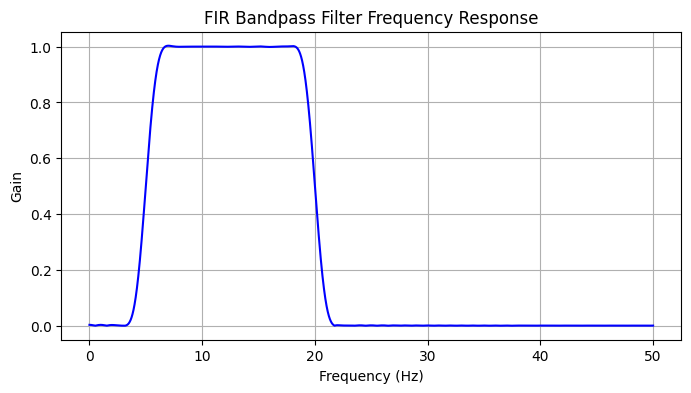

In [2]:
def fir_bandpass_filter(num_taps, lowcut, highcut, fs, window="hamming"):
    """
    Generates a FIR bandpass filter using the windowed sinc method.
    
    Parameters:
    - num_taps (int): Length of the filter (should be odd for best symmetry).
    - lowcut (float): Lower cutoff frequency (Hz).
    - highcut (float): Upper cutoff frequency (Hz).
    - fs (float): Sampling frequency (Hz).
    - window (str): Window function (default is 'hamming').

    Returns:
    - h (numpy array): Filter coefficients.
    """

    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist

    # Design FIR bandpass filter
    h = signal.firwin(num_taps, [low, high], pass_zero=False)

    return h

# Example usage
fs = 100        # Sampling frequency in Hz
num_taps = 101  # Filter length (must be odd for symmetry)
lowcut = 5      # Lower cutoff frequency in Hz
highcut = 20    # Upper cutoff frequency in Hz

h = fir_bandpass_filter(num_taps, lowcut, highcut, fs)

# Plot frequency response
w, h_response = signal.freqz(h, worN=8000)
plt.figure(figsize=(8, 4))
plt.plot((fs * 0.5 / np.pi) * w, np.abs(h_response), 'b')
plt.title("FIR Bandpass Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.grid()
plt.show()

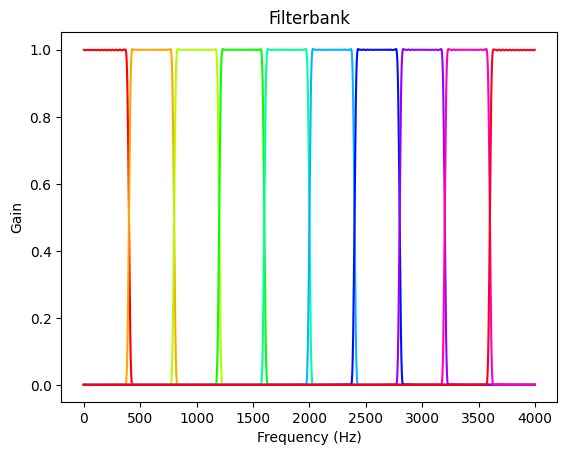

In [17]:
num_taps = 501      # how sharp the filter is (squaredness)
n_filters = 10      # number of filters
sample_freq = 8000  # changes x axis
bandwidth = 400     # changes bandwidth of each filter

filterbank = Filterbank(num_taps, n_filters, sample_freq, bandwidth)

# Plot frequency responses
filterbank.create_filterbank()
filterbank.plot_filterbank()